<a href="https://colab.research.google.com/github/albanogueira/Notebooks-Vision-Artificial/blob/main/01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción a los elementos básicos de una imagen

Vamos a explorar cómo trabajar con imágenes usando Python.
## 1. Cargar y mostrar una imagen
Primero, cargamos una imagen y la mostramos.

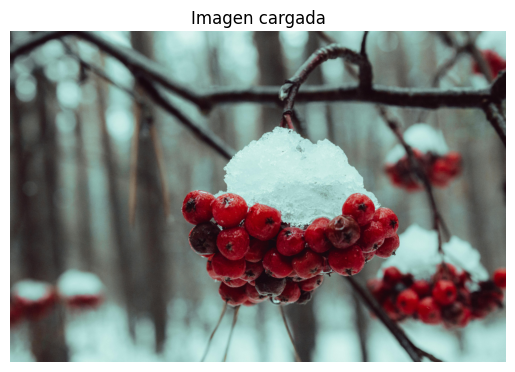

In [7]:
from PIL import Image
import matplotlib.pyplot as plt
import requests
from io import BytesIO

# URL de la imagen (pexels)
url = "https://images.pexels.com/photos/1676914/pexels-photo-1676914.jpeg"

# Obtener la imagen desde la URL
response = requests.get(url)
image = Image.open(BytesIO(response.content))

# Mostrar la imagen
plt.imshow(image)
plt.axis('off')
plt.title("Imagen cargada")
plt.show()

## 2. Ver los valores de los píxeles
Cada imagen se representa como una matriz de valores. Mostramos los valores de píxeles.


In [3]:
import numpy as np

# Obtener el tamaño (ancho x alto)
width, height = image.size
print(f"El tamaño de la imagen es {width}x{height} píxeles.")

# Convertir la imagen a matriz NumPy
image_array = np.array(image)

# Mostrar los primeros 5x5 píxeles
print("Matriz de píxeles (primeros 5x5):")
print(image_array[:5, :5, :])  # Mostrar solo los primeros 5x5 píxeles

El tamaño de la imagen es 5184x3456 píxeles.
Matriz de píxeles (primeros 5x5):
[[[66 64 65]
  [75 73 74]
  [76 76 76]
  [65 65 65]
  [54 54 54]]

 [[56 54 55]
  [72 70 71]
  [81 81 81]
  [71 71 71]
  [57 57 57]]

 [[47 45 46]
  [70 68 69]
  [87 87 87]
  [83 83 83]
  [67 67 67]]

 [[52 50 51]
  [70 68 69]
  [86 86 86]
  [87 87 87]
  [79 79 79]]

 [[67 65 66]
  [70 68 69]
  [71 71 71]
  [73 73 73]
  [77 77 77]]]


## 3. Operaciones básicas en la imagen

### 3.1 Convertir a escala de grises

Convertir una imagen a escala de grises se puede realizar utilizando diferentes librerías y técnicas en Python.
#### a) Utilizando librería Pillow

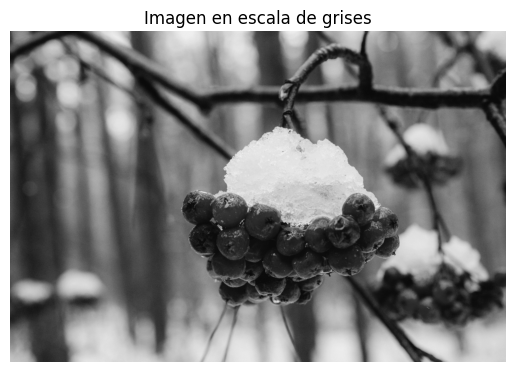

In [4]:
image_gray = image.convert("L")

# Mostrar la imagen en escala de grises
plt.imshow(image_gray, cmap="gray")
plt.axis('off')
plt.title("Imagen en escala de grises")
plt.show()

#### b) Utilizando Pillow con ImageOps

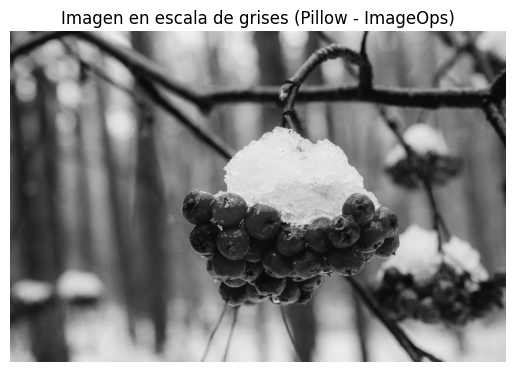

In [12]:
from PIL import ImageOps

# Convertir a escala de grises
image_gray = ImageOps.grayscale(image)

# Mostrar la imagen en escala de grises
plt.imshow(image_gray, cmap="gray")
plt.axis('off')
plt.title("Imagen en escala de grises (Pillow - ImageOps)")
plt.show()


#### c) Utilizando OpenCV
OpenCV ofrece funciones muy eficientes para procesar imágenes. Puedes convertir una imagen a escala de grises con ```cv2.cvtColor```.

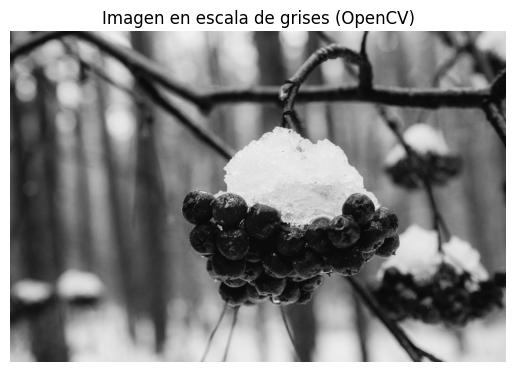

In [11]:
import cv2

# Convertir a escala de grises
image_gray = cv2.cvtColor(image_array, cv2.COLOR_BGR2GRAY)

# Mostrar la imagen en escala de grises
plt.imshow(image_gray, cmap="gray")
plt.axis('off')
plt.title("Imagen en escala de grises (OpenCV)")
plt.show()

#### d) Utilizando NumPy directamente

Puedes manipular la matriz de píxeles para calcular manualmente la escala de grises.La fórmula es:

$ \text{Grayscale} = 0.2989 \cdot R + 0.5870 \cdot G + 0.1140 \cdot B $.



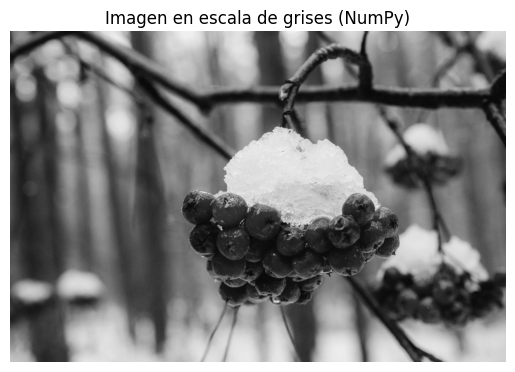

In [13]:
# Calcular la escala de grises
gray_array = 0.2989 * image_array[:, :, 0] + 0.5870 * image_array[:, :, 1] + 0.1140 * image_array[:, :, 2]

# Mostrar la imagen en escala de grises
plt.imshow(gray_array, cmap="gray")
plt.axis('off')
plt.title("Imagen en escala de grises (NumPy)")
plt.show()

## 3.2 Conversión de imágenes a un solo canal de color

Primero vamos a cargar otra imagen desde una URL

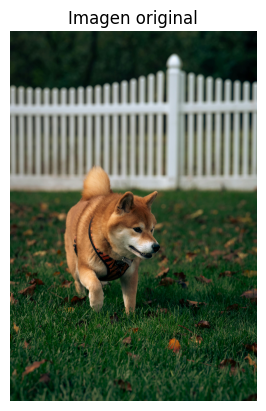

In [12]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

# URL de la imagen
image_url = "https://images.pexels.com/photos/30102888/pexels-photo-30102888/free-photo-of-shiba-inu-dog-playing-in-autumn-backyard.jpeg"

# Descargar la imagen desde la URL
response = requests.get(image_url)
image = Image.open(BytesIO(response.content))

# Mostrar la imagen original
plt.imshow(image) # Mostrar la imagen cargada
plt.axis('off')  # Ocultar ejes
plt.title("Imagen original") # Añadir título
plt.show() # Renderizar la imagen


##### a) Convertir la imagen a Rojo

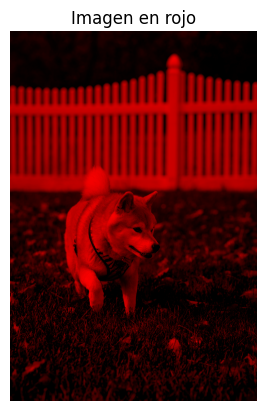

In [13]:
def convert_to_red(image):
    """
    Convierte la imagen a tonos de rojo.
    """
    # Convertir la imagen a modo RGB (por si está en otro modo)
    image_array = image.convert("RGB")

    # Obtener acceso directo a los píxeles de la imagen
    pixels = image_array.load()

    # Recorrer cada píxel de la imagen
    for x in range(image_array.width):      # Recorrer las columnas (ancho)
        for y in range(image_array.height): # Recorrer las filas (alto)
            r, g, b = pixels[x, y]          # Obtener los valores RGB del píxel
            pixels[x, y] = (r, 0, 0)        # Dejar solo el valor del canal rojo
    return image_array                      # Retornar la imagen modificada

# Convertir la imagen a tonos de rojo
red_image = convert_to_red(image)

# Mostrar la imagen en tonos de rojo
plt.imshow(red_image)       # Mostrar la imagen procesada
plt.axis('off')             # Ocultar los ejes
plt.title("Imagen en rojo") # Añadir título
plt.show()                  # Renderizar la imagen



#### b) Convertir la imagen a Verde

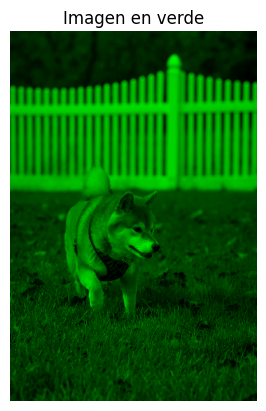

In [14]:
def convert_to_green(image):
    """
    Convierte la imagen a tonos de verde.
    """
    # Convertir la imagen a modo RGB
    image_array = image.convert("RGB")

    # Obtener acceso a los píxeles de la imagen
    pixels = image_array.load()

    # Recorrer cada píxel de la imagen
    for x in range(image_array.width):      # Recorrer las columnas (ancho)
        for y in range(image_array.height): # Recorrer las filas (alto)
            r, g, b = pixels[x, y]          # Obtener los valores RGB del píxel
            pixels[x, y] = (0, g, 0)        # Dejar solo el valor del canal verde
    return image_array                      # Retornar la imagen modificada

# Convertir la imagen a tonos de verde
green_image = convert_to_green(image)

# Mostrar la imagen en tonos de verde
plt.imshow(green_image)       # Mostrar la imagen procesada
plt.axis('off')               # Ocultar los ejes
plt.title("Imagen en verde")  # Añadir título
plt.show()                    # Renderizar la imagen en el notebook


#### c) Convertir la imagen a Azul

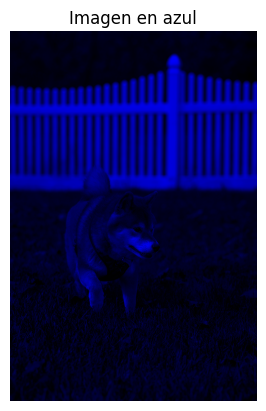

In [15]:
def convert_to_blue(image):
    """
    Convierte la imagen a tonos de azul.
    """
    # Convertir la imagen a modo RGB
    image_array = image.convert("RGB")

    # Obtener acceso a los píxeles de la imagen
    pixels = image_array.load()

    # Recorrer cada píxel de la imagen
    for x in range(image_array.width):      # Recorrer las columnas (ancho)
        for y in range(image_array.height): # Recorrer las filas (alto)
            r, g, b = pixels[x, y]          # Obtener los valores RGB del píxel
            pixels[x, y] = (0, 0, b)        # Dejar solo el valor del canal azul
    return image_array                      # Retornar la imagen modificada

# Convertir la imagen a tonos de azul
blue_image = convert_to_blue(image)

# Mostrar la imagen en tonos de azul
plt.imshow(blue_image)       # Mostrar la imagen procesada
plt.axis('off')              # Ocultar los ejes
plt.title("Imagen en azul")  # Añadir título
plt.show()                   # Renderizar la imagen en el notebook
